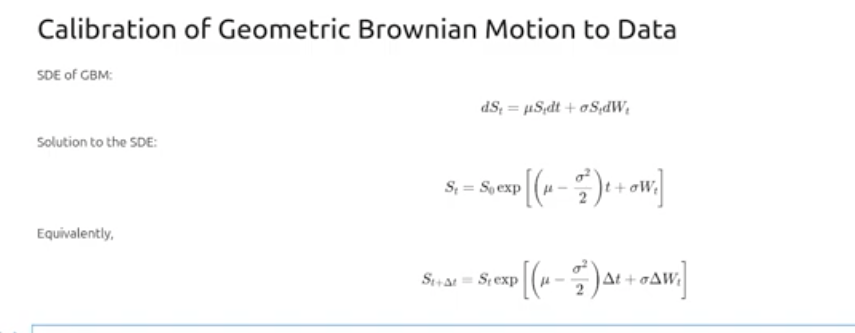



https://youtu.be/c-PUU2zOJck

In [4]:
import numpy as np
from scipy.stats import norm
import csv
# from contexlib import closing

In [6]:
class GBM:
    def __init__(self):
        self.mu = np.nan
        self.sigma = np.nan
        self.rng = np.random.default_rng()

    def calibrate(self, trajectory, Dt):
        increments = np.diff(np.log(trajectory))
        moments = [0, 0]
        n_iter = 10

        for iter in range(n_iter):
            X = self.rng.choice(increments, size=len(increments)//2, replace=False)
            moments[0] = np.mean(X)/n_iter
            moments[1] = np.mean(X**2)/n_iter

        std = np.sqrt(moments[1] - moments[0]**2)
        self.sigma = std/np.sqrt(Dt)
        self.mu = moments[0]/Dt + self.sigma**2 / 2
        
                                